In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

Text(0.5, 1.0, 'Hawaiin Precipitation from 2016-08 to 2018-08')

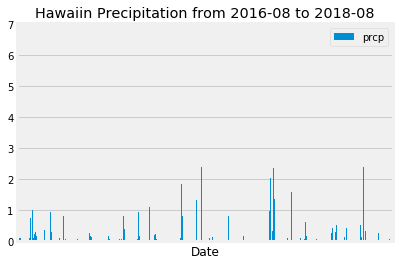

In [20]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

# Calculate the date 1 year ago from the last data point in the database
dates = []
prcp = []
measurements = (session.query(Measurement))
for date in measurements:
    dates.append(date.date)

prc_df= pd.DataFrame(dates)

last_date = prc_df.iloc[prc_df.index[-1],0]
# print('The last date in the data set is '+ last_date)
year_ago = '2016-08-23'
# Perform a query to retrieve the data and precipitation scores
last_year_dates = session.query(Measurement.date).filter(Measurement.date <= last_date).filter(Measurement.date >= year_ago)
last_year_prc = session.query(Measurement.prcp).filter(Measurement.date <= last_date).filter(Measurement.date >= year_ago)

new_dates = []
new_prcps = []
for new_date in last_year_dates:
    new_dates.append(new_date.date)
    
for new_prcp in last_year_prc:
    new_prcps.append(new_prcp.prcp)
year_ago_df = pd.DataFrame(new_dates)
year_ago_df['prcp'] = new_prcps
year_ago_df = year_ago_df.rename(columns = {0:'Date'})
year_ago_df = year_ago_df.set_index('Date')
year_ago_df = year_ago_df.sort_values('Date')

year_ago_df.head()
# Save the query results as a Pandas DataFrame and set the index to the date column

# Sort the dataframe by date

# Use Pandas Plotting with Matplotlib to plot the data
year_ago_df.plot.bar(rot = 0)
plt.xticks([])
plt.title('Hawaiin Precipitation from 2016-08 to 2018-08')

![precipitation](Images/precipitation.png)

In [17]:
# Use Pandas to calcualte the summary statistics for the precipitation data
year_ago_df.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


![describe](Images/describe.png)

In [26]:
# Design a query to show how many stations are available in this dataset?
different_stations = session.query(Station.station)
stations = []
for station in different_stations:
    stations.append(station.station)
len(stations)

9

In [48]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
stations_all = session.query(Measurement.station)
all_stations = []
for x in stations_all:
    all_stations.append(x.station)
all_stations = pd.DataFrame(all_stations)
all_stations = all_stations.rename(columns = {0:'Station'})

all_stations['Station'].value_counts()

USC00519281    2772
USC00519397    2724
USC00513117    2709
USC00519523    2669
USC00516128    2612
USC00514830    2202
USC00511918    1979
USC00517948    1372
USC00518838     511
Name: Station, dtype: int64

In [114]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
most_station = 'USC00519281'
most_active_min = session.query(func.min(Measurement.tobs).label('min')).filter(Measurement.station == most_station)
most_active_max = session.query(func.max(Measurement.tobs).label('max')).filter(Measurement.station == most_station)
most_active_avg = session.query(func.avg(Measurement.tobs).label('average')).filter(Measurement.station == most_station)
print(most_active_min.all(),most_active_max.all(),most_active_avg.all())

[(54.0,)] [(85.0,)] [(71.66378066378067,)]


In [126]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temps_year = session.query(Measurement.date,Measurement.tobs).filter(Measurement.station == most_station).filter(Measurement.date <= '2017-08-23').filter(Measurement.date >= '2016-08-23')
temps_dates = []
temps_tobs = []
for j in temps_year:
    temps_dates.append(j.date)
for k in temps_year:
    temps_tobs.append(k.tobs)
temps_year_df = pd.DataFrame(temps_dates)
temps_year_df['tobs'] = temps_tobs
temps_year_df = temps_year_df.rename(columns = {0:'Date'})

Text(0, 0.5, 'Frequency')

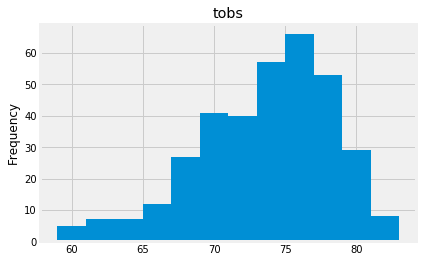

In [132]:
temps_year_df.hist(bins = 12)
plt.ylabel('Frequency')


![precipitation](Images/station-histogram.png)